<a href="https://colab.research.google.com/github/Divyanshu-ISM/Time-Series-Forecasting-/blob/main/Time_Series_2_Data_Processing_for_Stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this Project : We will look at How Stationarity is checked for visually and by simple methods and if TS is not stationary, how can it be converted to a stationary series.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream_vs_heater.csv'

In [3]:
df = pd.read_csv(path, index_col=0, parse_dates=True)

In [4]:
df.head()

,heater,ice cream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21


## Inferring and Setting Frequency

In [5]:
pd.infer_freq(df.index)

'MS'

In [6]:
df.index.freq

In [7]:
df = df.asfreq(pd.infer_freq(df.index))

In [8]:
df.index.freq

<MonthBegin>

In [9]:
df_heater = df[['heater']]

In [10]:
df_ice = df[['ice cream']]

In [11]:
df_heater.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='Month', length=198, freq='MS')

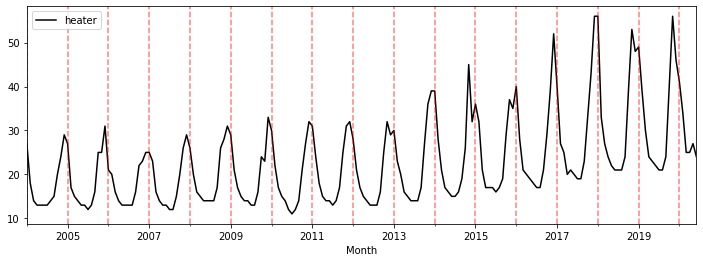

In [12]:
ax = df_heater.plot(figsize=(12,4), color='k')

for y in range(2003, 2021):
  ax.axvline(pd.to_datetime(f'{y}-01-01'), color='red', alpha=0.5, ls='--')

### Normalize

In [13]:
avg, dev = df['heater'].mean(), df['heater'].std()

In [14]:
df_heater['heater_scaled'] = (df_heater['heater'] - avg)/dev

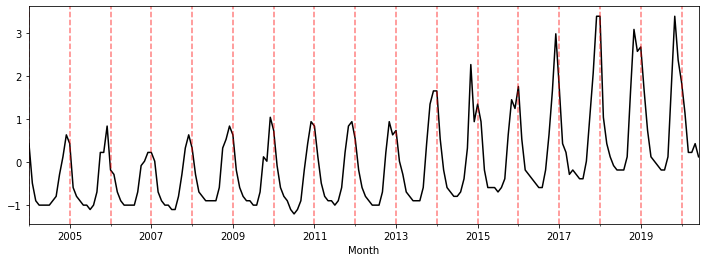

In [15]:
df_heater['heater_scaled'].plot(figsize=(12,4), color='k')

for y in range(2003, 2021):
  plt.axvline(pd.to_datetime(f'{y}-01-01'), color='red', alpha=0.5, ls='--')

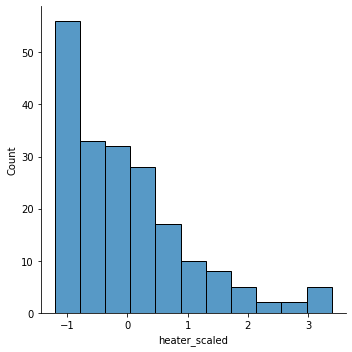

In [16]:
import seaborn as sns
sns.displot(df_heater['heater_scaled'])

#STATIONARITY : Following Sections will be to make the TS stationary

### Stationarity has two rules :-

1. The Mean must be constant over time
2. The Volatality/Variability must not change and must be constant over time. 
3. There should be no seasonality.

The first is met by first differencing. 

The second is met by de-noising or reducing the time-wise variability so that entire TS has constant variability. 

The third is handled by removing seasonal component.

## 1.First Differencing to induce Stationarity

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f38190a50>,
      dtype=object)

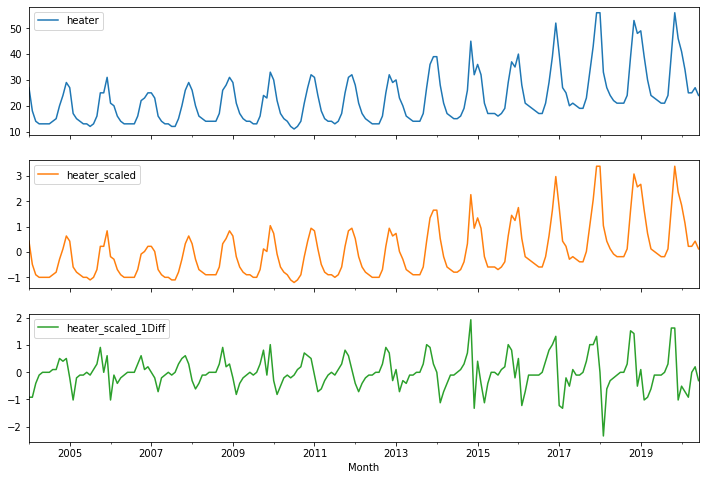

In [17]:
df_heater['heater_scaled_1Diff'] = df_heater['heater_scaled'].diff().fillna(method='bfill')

df_heater.plot(figsize=(12,8), subplots=True)

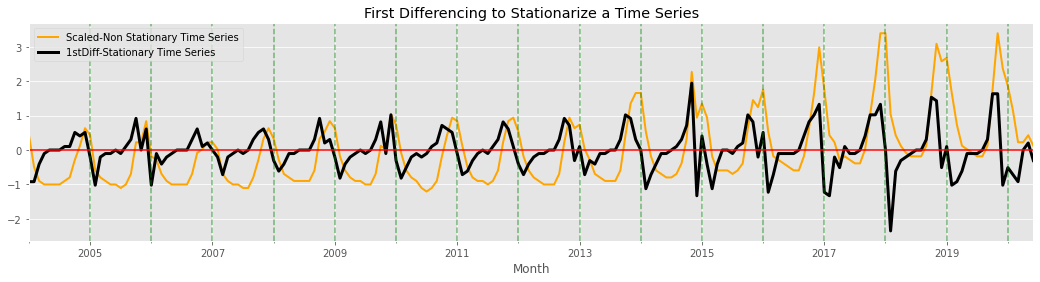

In [18]:
plt.style.use('ggplot')



df_heater['heater_scaled'].plot(figsize=(18,6),  color='orange', label='Scaled-Non Stationary Time Series', lw=2)
df_heater['heater_scaled_1Diff'].plot(figsize=(18,4), color='k', lw=3,label='1stDiff-Stationary Time Series')

plt.axhline(0, color='red')
for y in range(2003, 2021):
  plt.axvline(pd.to_datetime(f'{y}-01-01'), color='green', alpha=0.5, ls='--')



plt.title('First Differencing to Stationarize a Time Series')
plt.legend(loc='best')

## 2. To Remove Time-varying STD-Dev : Divide every data point with its yearly stddev.

Text(0.5, 1.0, 'Varying Standard Deviation over time')

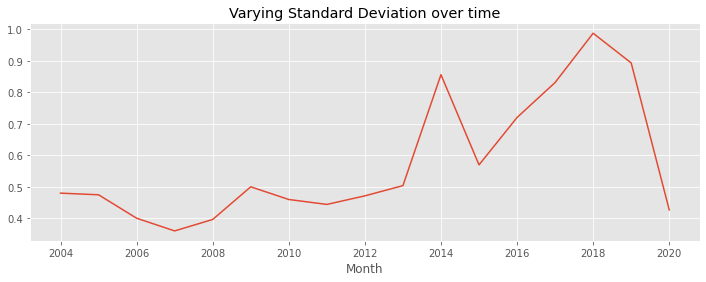

In [39]:
yearwise_variability = df_heater['heater_scaled_1Diff'].groupby(df_heater.index.year).std()

yearwise_variability.plot(figsize=(12,4))
plt.title('Varying Standard Deviation over time')

In [40]:
df_yearwise_variability = pd.DataFrame(yearwise_variability).reset_index().rename(columns={'Month':'Year', 'heater_scaled_1Diff':'STD'})

df_yearwise_variability

,Year,STD
0,2004,0.479740
1,2005,0.474527
2,2006,0.400148
3,2007,0.359839
4,2008,0.396182
5,2009,0.499810
6,2010,0.459566
7,2011,0.443924
8,2012,0.471104
9,2013,0.503587


In [41]:
df_heater['Year'] = df.index.year

In [43]:
df_heater2 = df_heater.merge(df_yearwise_variability, on='Year', how='left')

In [48]:
df_heater2.columns

Index(['heater', 'heater_scaled', 'heater_scaled_1Diff', 'Year', 'STD',
       'heater_scaled_final'],
      dtype='object')

In [49]:
df_heater2['heater_scaled_1Dfinal'] = df_heater2['heater_scaled_1Diff']/df_heater2['STD']

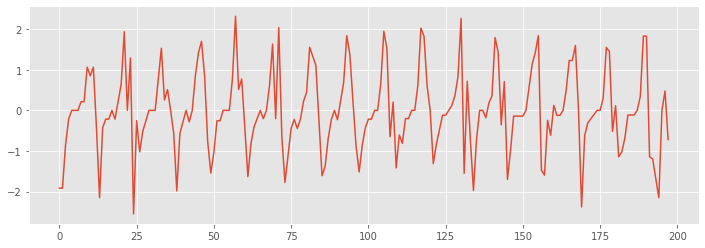

In [50]:
df_heater2['heater_scaled_1Dfinal'].plot(figsize=(12,4))

## 3. Seasonality Removal

In [52]:
df_heater2.index = df.index

In [53]:
df_heater2

,heater,heater_scaled,heater_scaled_1Diff,Year,STD,heater_scaled_final,heater_scaled_1Dfinal
Month,,,,,,,
2004-01-01,27,0.429490,-0.918789,2004,0.479740,0.895257,-1.915183
2004-02-01,18,-0.489299,-0.918789,2004,0.479740,-1.019926,-1.915183
2004-03-01,14,-0.897650,-0.408351,2004,0.479740,-1.871118,-0.851192
2004-04-01,13,-0.999738,-0.102088,2004,0.479740,-2.083916,-0.212798
2004-05-01,13,-0.999738,0.000000,2004,0.479740,-2.083916,0.000000
...,...,...,...,...,...,...,...
2020-02-01,34,1.144104,-0.714614,2020,0.426657,2.681557,-1.674916
2020-03-01,25,0.225315,-0.918789,2020,0.426657,0.528094,-2.153463
2020-04-01,25,0.225315,0.000000,2020,0.426657,0.528094,0.000000


### Lets find the Avg Heater sales for All Januaries, All Febs and so on.

In [66]:
monthwise_avg = df_heater2[['heater_scaled_1Dfinal']].groupby(df_heater2.index.month).mean().rename(columns={'heater_scaled_1Dfinal':'Monthly_Avg'})

monthwise_avg

,Monthly_Avg
Month,
1,-0.515820
2,-1.465706
3,-1.055851
4,-0.440990
5,-0.121663
6,-0.128425
7,-0.107093
8,0.073663
9,0.542581


In [67]:
df_monthwise_avg = monthwise_avg.reset_index()

Can see a more than average sales in winters and less than avg in summers

In [68]:
df_monthwise_avg

,Month,Monthly_Avg
0,1,-0.515820
1,2,-1.465706
2,3,-1.055851
3,4,-0.440990
4,5,-0.121663
5,6,-0.128425
6,7,-0.107093
7,8,0.073663
8,9,0.542581
9,10,1.602885


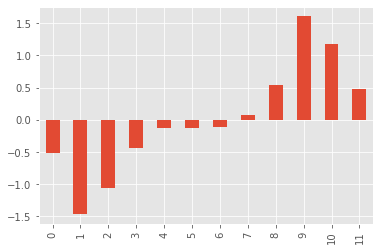

In [62]:
df_monthwise_avg['heater_scaled_1Dfinal'].plot(kind='bar')

In [69]:
df_heater2['Month'] = df_heater2.index.month

In [71]:
df_heater2

,heater,heater_scaled,heater_scaled_1Diff,Year,STD,heater_scaled_final,heater_scaled_1Dfinal,Month
Month,,,,,,,,
2004-01-01,27,0.429490,-0.918789,2004,0.479740,0.895257,-1.915183,1
2004-02-01,18,-0.489299,-0.918789,2004,0.479740,-1.019926,-1.915183,2
2004-03-01,14,-0.897650,-0.408351,2004,0.479740,-1.871118,-0.851192,3
2004-04-01,13,-0.999738,-0.102088,2004,0.479740,-2.083916,-0.212798,4
2004-05-01,13,-0.999738,0.000000,2004,0.479740,-2.083916,0.000000,5
...,...,...,...,...,...,...,...,...
2020-02-01,34,1.144104,-0.714614,2020,0.426657,2.681557,-1.674916,2
2020-03-01,25,0.225315,-0.918789,2020,0.426657,0.528094,-2.153463,3
2020-04-01,25,0.225315,0.000000,2020,0.426657,0.528094,0.000000,4


In [72]:
df_heater2.index.rename('Date', inplace= True)

In [74]:
df_heater3 = df_heater2.merge(df_monthwise_avg, on='Month', how='left')

In [76]:
df_heater3['heater_scaled_1Dfinal_Stationary'] = df_heater3['heater_scaled_1Dfinal'] - df_heater3['Monthly_Avg']

In [81]:
df_heater3

,heater,heater_scaled,heater_scaled_1Diff,Year,STD,heater_scaled_final,heater_scaled_1Dfinal,Month,Monthly_Avg,heater_scaled_1Dfinal_Stationary
0,27,0.429490,-0.918789,2004,0.479740,0.895257,-1.915183,1,-0.515820,-1.399363
1,18,-0.489299,-0.918789,2004,0.479740,-1.019926,-1.915183,2,-1.465706,-0.449477
2,14,-0.897650,-0.408351,2004,0.479740,-1.871118,-0.851192,3,-1.055851,0.204659
3,13,-0.999738,-0.102088,2004,0.479740,-2.083916,-0.212798,4,-0.440990,0.228192
4,13,-0.999738,0.000000,2004,0.479740,-2.083916,0.000000,5,-0.121663,0.121663
...,...,...,...,...,...,...,...,...,...,...
193,34,1.144104,-0.714614,2020,0.426657,2.681557,-1.674916,2,-1.465706,-0.209210
194,25,0.225315,-0.918789,2020,0.426657,0.528094,-2.153463,3,-1.055851,-1.097612
195,25,0.225315,0.000000,2020,0.426657,0.528094,0.000000,4,-0.440990,0.440990
196,27,0.429490,0.204175,2020,0.426657,1.006641,0.478547,5,-0.121663,0.600210


In [82]:
df_heater_FINAL = df_heater3[['heater_scaled_1Dfinal_Stationary']].set_index(df.index)

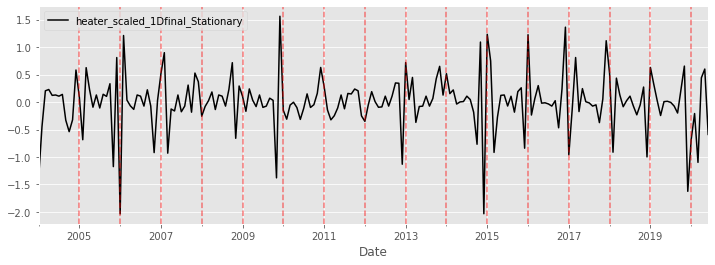

In [85]:
df_heater_FINAL.plot(figsize=(12,4), color='k')
for y in range(2003, 2021):
  plt.axvline(pd.to_datetime(f'{y}-01-01'), color='red', alpha=0.5, ls='--')

## This Time-Series Does look stationary as-

1. It has a constant mean (around 0) with time. 

2. It has a consistent noise/variability with time. 

3. It has no Seasonality.

## HENCE, this time series is now ready for ARMA models it seems. 



### However, the proof of Stationarity is still visual. For statistical proof we might need to use Statistical Tests like :>

1. Dickey Fuller test

ETC...